## 04.04.2022

# <center>Извлечение признаков из временного ряда</center>

### Задание №1

In [33]:
import numpy as np
import pandas as pd
import math
from scipy import optimize
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
passengers = pd.read_csv('C:/Users/mag/passengers.csv', index_col=0, parse_dates=True)

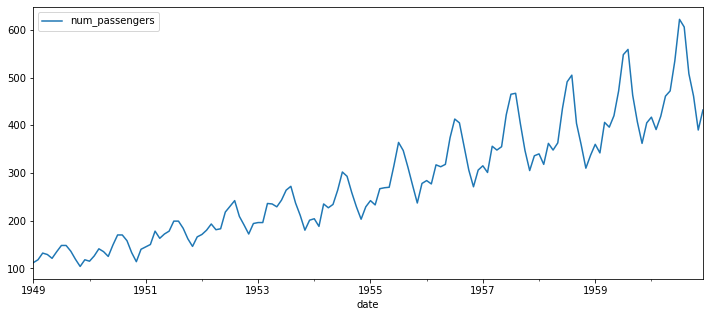

In [225]:
passengers.plot(figsize=(12,5))
plt.show()

In [226]:
passengers.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='date', length=144)

In [273]:
passengers['month'] = passengers.index.month

In [228]:
passengers

,num_passengers,month
date,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


In [275]:
passengers['x0'] = 1

In [276]:
passengers

,num_passengers,x0
date,,
1949-01-01,112,1
1949-02-01,118,1
1949-03-01,132,1
1949-04-01,129,1
1949-05-01,121,1
...,...,...
1960-08-01,606,1
1960-09-01,508,1
1960-10-01,461,1


In [277]:
passengers['num'] = range(0, len(passengers))

In [232]:
passengers

,num_passengers,month,x0,num
date,,,,
1949-01-01,112,1,1,0
1949-02-01,118,2,1,1
1949-03-01,132,3,1,2
1949-04-01,129,4,1,3
1949-05-01,121,5,1,4
...,...,...,...,...
1960-08-01,606,8,1,139
1960-09-01,508,9,1,140
1960-10-01,461,10,1,141


In [278]:
passengers['sin'] = np.sin((2*np.pi*(passengers['num']))/12)

In [234]:
passengers

,num_passengers,month,x0,num,sin
date,,,,,
1949-01-01,112,1,1,0,0.000000
1949-02-01,118,2,1,1,0.500000
1949-03-01,132,3,1,2,0.866025
1949-04-01,129,4,1,3,1.000000
1949-05-01,121,5,1,4,0.866025
...,...,...,...,...,...
1960-08-01,606,8,1,139,-0.500000
1960-09-01,508,9,1,140,-0.866025
1960-10-01,461,10,1,141,-1.000000


In [279]:
passengers['cos'] = np.cos((2*np.pi*(passengers['num']))/12)

In [236]:
passengers

,num_passengers,month,x0,num,sin,cos
date,,,,,,
1949-01-01,112,1,1,0,0.000000,1.000000e+00
1949-02-01,118,2,1,1,0.500000,8.660254e-01
1949-03-01,132,3,1,2,0.866025,5.000000e-01
1949-04-01,129,4,1,3,1.000000,6.123234e-17
1949-05-01,121,5,1,4,0.866025,-5.000000e-01
...,...,...,...,...,...,...
1960-08-01,606,8,1,139,-0.500000,-8.660254e-01
1960-09-01,508,9,1,140,-0.866025,-5.000000e-01
1960-10-01,461,10,1,141,-1.000000,-1.175970e-14


In [237]:
def mse (teta1, teta2, teta3, teta4):
    return np.mean((-teta2 * passengers['num'] - teta3 * passengers['sin'] - teta4 * passengers['cos'] - teta1 * passengers['x0'] + passengers['num_passengers'])**2)

In [238]:
res = optimize.minimize(lambda x: mse(x[0], x[1], x[2], x[3]),(1,1,1,1))
res

      fun: 1042.0664148570786
 hess_inv: array([[ 7.70991956e-02, -7.17286952e-04,  4.27780696e-02,
        -1.15681625e-01],
       [-7.17286952e-04,  5.31984842e-05, -4.21990204e-04,
         1.06756017e-03],
       [ 4.27780696e-02, -4.21990204e-04,  2.84266174e-02,
        -6.29693340e-02],
       [-1.15681625e-01,  1.06756017e-03, -6.29693340e-02,
         1.77069358e-01]])
      jac: array([0.00000000e+00, 6.10351562e-05, 0.00000000e+00, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 150
      nit: 16
     njev: 30
   status: 2
  success: False
        x: array([ 90.83236846,   2.64987761,   5.42625996, -45.49951394])

In [239]:
teta1, teta2, teta3, teta4 = res.x

In [240]:
a = teta2 * passengers['num'] + teta3 * passengers['sin'] + teta4 * passengers['cos'] 

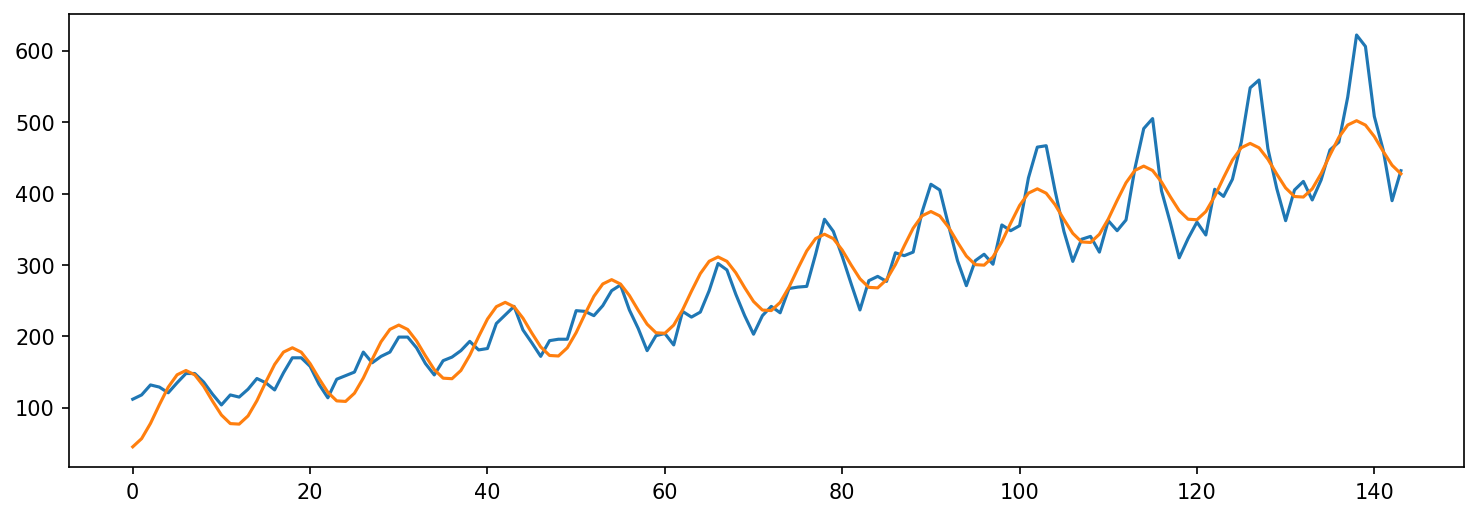

In [241]:
plt.figure(figsize=(12,4), dpi = 150)
plt.plot(passengers['num_passengers'].values)
plt.plot(np.dot(passengers.loc[:, 'x0':], res.x))

#### Для построения прогноза воспользуемся методом .predict(start, end) и моделью Хольта-Уинтерса

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [138]:
holt_winters_trend = ExponentialSmoothing(a, initialization_method="estimated",
                                          trend="add", seasonal="add").fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [139]:
start = a.index[-1] + pd.DateOffset(months=1)
end = start + pd.DateOffset(months=35)
start, end

(Timestamp('1961-01-01 00:00:00'), Timestamp('1963-12-01 00:00:00'))

In [140]:
holt_winters_forecast = holt_winters_trend.predict(start=start, end=end)

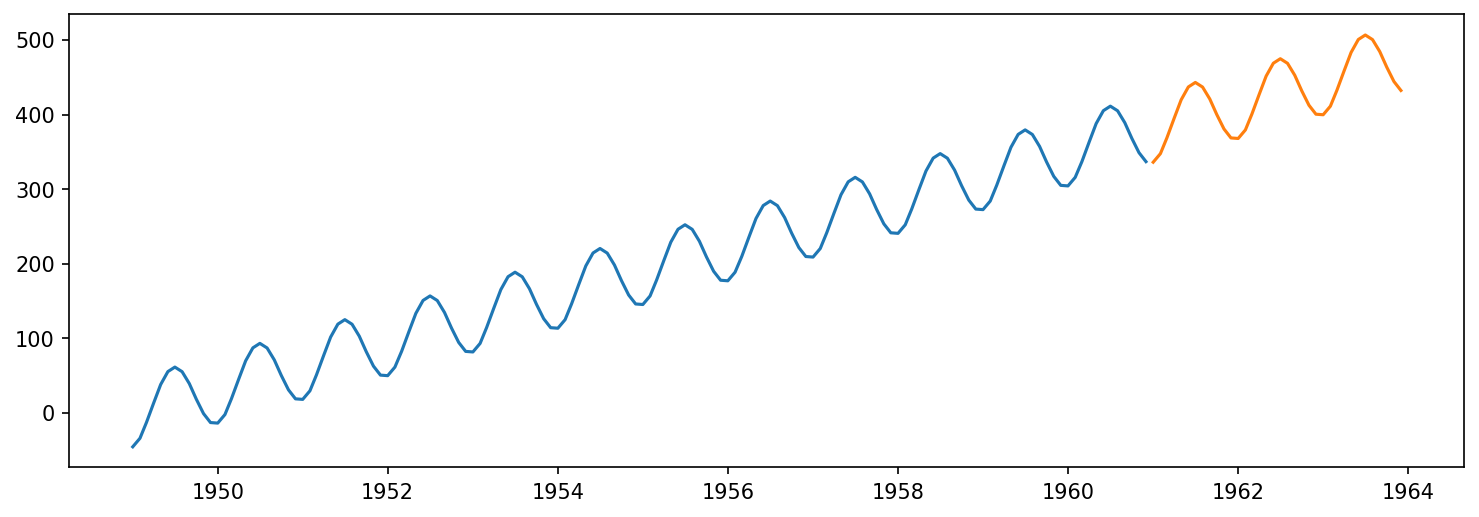

In [141]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(a)
plt.plot(holt_winters_forecast)
plt.show()

In [142]:
ostatki = passengers['num_passengers'] - a

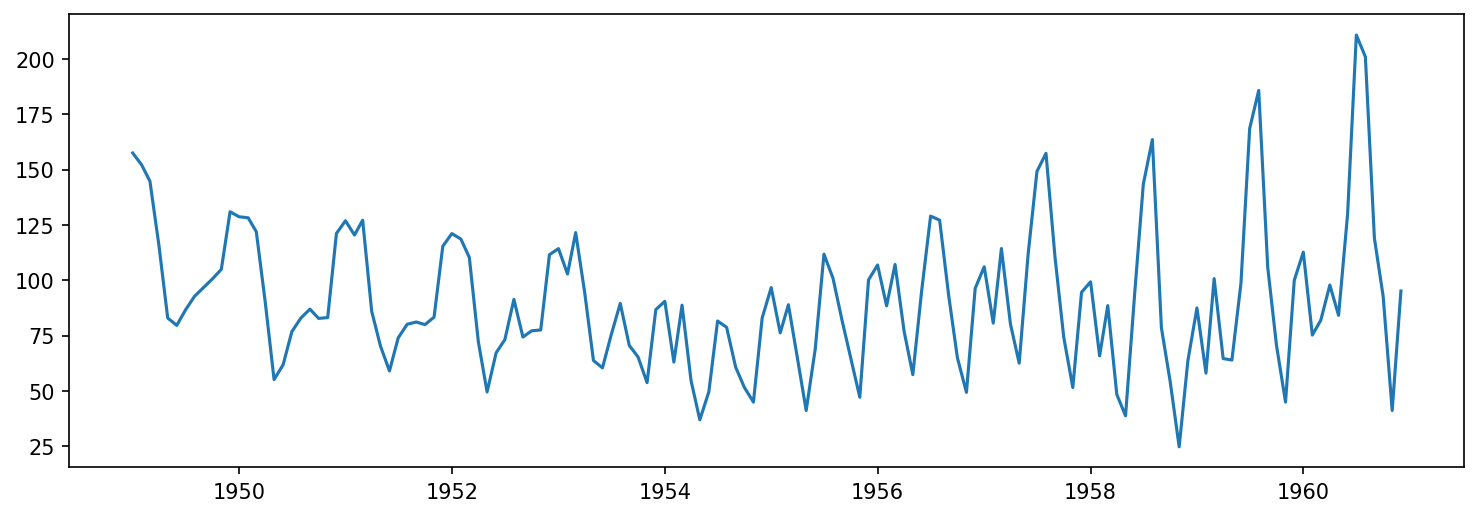

In [143]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(ostatki)
plt.show()

# 11.04.2022

In [285]:
for n in range(2,12):
    passengers[f'sin{n}'] = np.sin((n*2*np.pi*(passengers['num']))/12)
    passengers[f'cos{n}'] = np.cos((n*2*np.pi*(passengers['num']))/12)

In [286]:
passengers

,num_passengers,x0,num,sin,cos,sin2,cos2,sin3,cos3,sin4,...,sin7,cos7,sin8,cos8,sin9,cos9,sin10,cos10,sin11,cos11
date,,,,,,,,,,,,,,,,,,,,,
1949-01-01,112,1,0,0.000000,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000,1.000000e+00
1949-02-01,118,1,1,0.500000,8.660254e-01,8.660254e-01,0.5,1.000000e+00,6.123234e-17,8.660254e-01,...,-0.500000,-8.660254e-01,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16,-8.660254e-01,0.5,-0.500000,8.660254e-01
1949-03-01,132,1,2,0.866025,5.000000e-01,8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,-8.660254e-01,...,0.866025,5.000000e-01,8.660254e-01,-0.5,3.673940e-16,-1.000000e+00,-8.660254e-01,-0.5,-0.866025,5.000000e-01
1949-04-01,129,1,3,1.000000,6.123234e-17,1.224647e-16,-1.0,-1.000000e+00,-1.836970e-16,-2.449294e-16,...,-1.000000,-4.286264e-16,-4.898587e-16,1.0,1.000000e+00,5.510911e-16,2.388680e-15,-1.0,-1.000000,-2.449913e-15
1949-05-01,121,1,4,0.866025,-5.000000e-01,-8.660254e-01,-0.5,-2.449294e-16,1.000000e+00,8.660254e-01,...,0.866025,-5.000000e-01,-8.660254e-01,-0.5,-7.347881e-16,1.000000e+00,8.660254e-01,-0.5,-0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,1,139,-0.500000,-8.660254e-01,8.660254e-01,0.5,-1.000000e+00,-1.028765e-14,8.660254e-01,...,0.500000,8.660254e-01,-8.660254e-01,-0.5,1.000000e+00,3.086296e-14,-8.660254e-01,0.5,0.500000,-8.660254e-01
1960-09-01,508,1,140,-0.866025,-5.000000e-01,8.660254e-01,-0.5,1.274375e-14,1.000000e+00,-8.660254e-01,...,-0.866025,-5.000000e-01,8.660254e-01,-0.5,9.809554e-15,1.000000e+00,-8.660254e-01,-0.5,0.866025,-5.000000e-01
1960-10-01,461,1,141,-1.000000,-1.175970e-14,2.351941e-14,-1.0,1.000000e+00,2.106826e-14,-4.703882e-14,...,1.000000,1.126366e-14,-9.407763e-14,1.0,-1.000000e+00,-6.320477e-14,3.233191e-14,-1.0,1.000000,1.151459e-13


In [244]:
del passengers['month']

In [245]:
passengers

,num_passengers,x0,num,sin,cos,sin2,cos2,sin3,cos3,sin4,...,sin7,cos7,sin8,cos8,sin9,cos9,sin10,cos10,sin11,cos11
date,,,,,,,,,,,,,,,,,,,,,
1949-01-01,112,1,0,0.000000,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000,1.000000e+00
1949-02-01,118,1,1,0.500000,8.660254e-01,8.660254e-01,0.5,1.000000e+00,6.123234e-17,8.660254e-01,...,-0.500000,-8.660254e-01,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16,-8.660254e-01,0.5,-0.500000,8.660254e-01
1949-03-01,132,1,2,0.866025,5.000000e-01,8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,-8.660254e-01,...,0.866025,5.000000e-01,8.660254e-01,-0.5,3.673940e-16,-1.000000e+00,-8.660254e-01,-0.5,-0.866025,5.000000e-01
1949-04-01,129,1,3,1.000000,6.123234e-17,1.224647e-16,-1.0,-1.000000e+00,-1.836970e-16,-2.449294e-16,...,-1.000000,-4.286264e-16,-4.898587e-16,1.0,1.000000e+00,5.510911e-16,2.388680e-15,-1.0,-1.000000,-2.449913e-15
1949-05-01,121,1,4,0.866025,-5.000000e-01,-8.660254e-01,-0.5,-2.449294e-16,1.000000e+00,8.660254e-01,...,0.866025,-5.000000e-01,-8.660254e-01,-0.5,-7.347881e-16,1.000000e+00,8.660254e-01,-0.5,-0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,1,139,-0.500000,-8.660254e-01,8.660254e-01,0.5,-1.000000e+00,-1.028765e-14,8.660254e-01,...,0.500000,8.660254e-01,-8.660254e-01,-0.5,1.000000e+00,3.086296e-14,-8.660254e-01,0.5,0.500000,-8.660254e-01
1960-09-01,508,1,140,-0.866025,-5.000000e-01,8.660254e-01,-0.5,1.274375e-14,1.000000e+00,-8.660254e-01,...,-0.866025,-5.000000e-01,8.660254e-01,-0.5,9.809554e-15,1.000000e+00,-8.660254e-01,-0.5,0.866025,-5.000000e-01
1960-10-01,461,1,141,-1.000000,-1.175970e-14,2.351941e-14,-1.0,1.000000e+00,2.106826e-14,-4.703882e-14,...,1.000000,1.126366e-14,-9.407763e-14,1.0,-1.000000e+00,-6.320477e-14,3.233191e-14,-1.0,1.000000,1.151459e-13


In [246]:
def mse2 (passengers, x):
    passengers2 = passengers.drop('num_passengers', axis=1)
    forecast = np.dot(passengers2, x)
    sq = (forecast - passengers['num_passengers'])**2
    return sq.mean()

In [247]:
res2 = minimize(lambda x: mse2(passengers, x), np.zeros(len(passengers.columns)-1))
res2

      fun: 630.6943908233303
 hess_inv: array([[ 5.06978488e-02,  1.37244850e-04, -1.46344216e-02,
         6.22690607e-02,  1.88766098e-02,  1.54154377e-02,
        -4.93114021e-02, -3.10239226e-02,  2.32533239e-02,
        -8.68675972e-03,  2.50861890e-02, -2.76235865e-02,
         0.00000000e+00, -1.03439241e-02,  2.99651298e-02,
         8.91318205e-03, -4.49954918e-02, -8.68675972e-03,
         5.82720091e-02, -3.10239226e-02,  1.22467920e-02,
         1.54154377e-02, -2.81904703e-02, -4.44323746e-02],
       [ 1.37244850e-04,  9.13558677e-05, -6.68869185e-05,
        -7.45163559e-04, -7.39449914e-04, -2.21023365e-04,
         4.78140475e-04,  5.11192794e-04, -1.28959765e-04,
         4.53496417e-05, -7.95687224e-05,  2.20698293e-04,
         0.00000000e+00,  1.65892476e-04, -6.13685963e-04,
         6.05751883e-04,  9.70374480e-04,  4.53496417e-05,
        -5.80152003e-04,  5.11192794e-04, -3.71448054e-04,
        -2.21023365e-04,  6.98497228e-04,  2.52903698e-04],
       [-1.463

In [248]:
teta = [ 90.08507007,   2.66032924,   2.731919  , -22.7445182 ,
         8.11308393,   9.7121068 ,  -4.23389501,  -1.86428084,
        -3.22693098,   2.02460905,  -2.85020758,   1.20351454,
         0.        ,  -0.5795581 ,   2.84873774,   1.20343556,
         3.2238093 ,   2.02460905,   4.23077686,  -1.86428084,
        -8.11391628,   9.7121068 ,  -2.73334232, -22.74454608]

In [249]:
passengers2 = passengers.drop('num_passengers', axis=1)
forecast = np.dot(passengers2, teta)

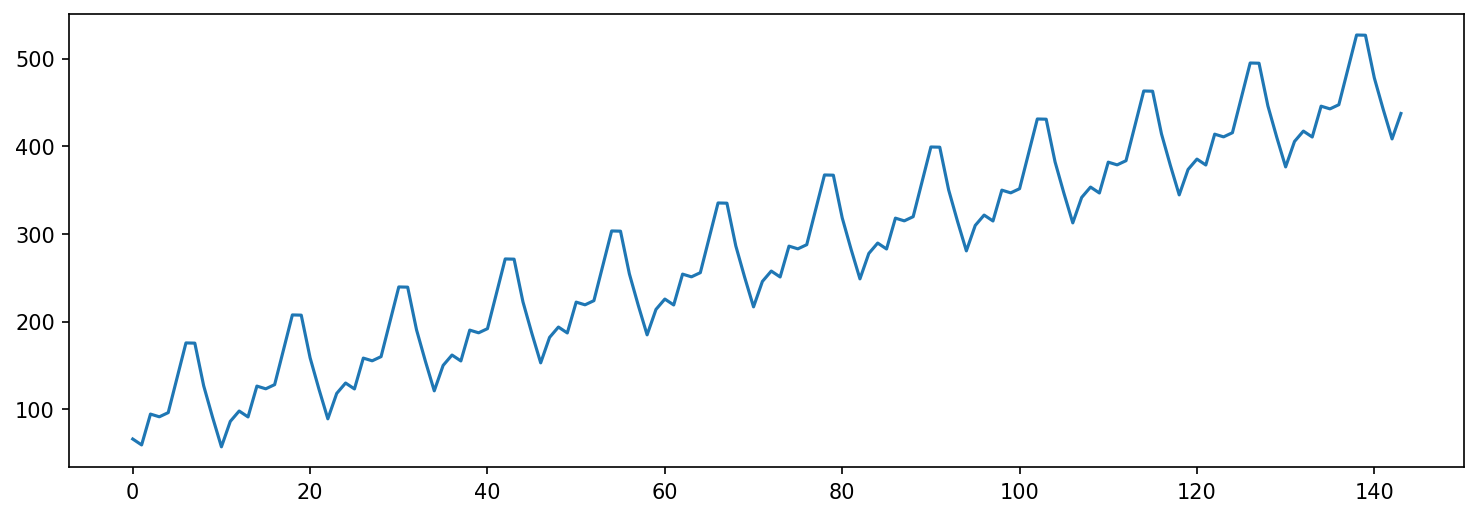

In [250]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(forecast)
plt.show()

In [251]:
len(teta)

24

In [252]:
new = pd.date_range(start = '1949-01-01 00:00:00', end = '1963-12-01 00:00:00', freq = 'M')
passengers = pd.read_csv('C:/Users/mag/passengers.csv', index_col=0, parse_dates=True)

In [253]:
f = passengers.reindex(new)

In [254]:
f['x0'] = 1
f['num'] = range(0, len(f))


In [255]:
for n in range(1,12):
    f[f'sin{n}'] = np.sin((n*2*np.pi*(f['num']))/12)
    f[f'cos{n}'] = np.cos((n*2*np.pi*(f['num']))/12)

In [256]:
teta = [ 90.08507007,   2.66032924,   2.731919  , -22.7445182 ,
         8.11308393,   9.7121068 ,  -4.23389501,  -1.86428084,
        -3.22693098,   2.02460905,  -2.85020758,   1.20351454,
         0.        ,  -0.5795581 ,   2.84873774,   1.20343556,
         3.2238093 ,   2.02460905,   4.23077686,  -1.86428084,
        -8.11391628,   9.7121068 ,  -2.73334232, -22.74454608]

In [257]:
f

,num_passengers,x0,num,sin1,cos1,sin2,cos2,sin3,cos3,sin4,...,sin7,cos7,sin8,cos8,sin9,cos9,sin10,cos10,sin11,cos11
1949-01-31,NaN,1,0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00
1949-02-28,NaN,1,1,5.000000e-01,8.660254e-01,8.660254e-01,0.5,1.000000e+00,6.123234e-17,8.660254e-01,...,-5.000000e-01,-8.660254e-01,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16,-8.660254e-01,0.5,-5.000000e-01,8.660254e-01
1949-03-31,NaN,1,2,8.660254e-01,5.000000e-01,8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,-8.660254e-01,...,8.660254e-01,5.000000e-01,8.660254e-01,-0.5,3.673940e-16,-1.000000e+00,-8.660254e-01,-0.5,-8.660254e-01,5.000000e-01
1949-04-30,NaN,1,3,1.000000e+00,6.123234e-17,1.224647e-16,-1.0,-1.000000e+00,-1.836970e-16,-2.449294e-16,...,-1.000000e+00,-4.286264e-16,-4.898587e-16,1.0,1.000000e+00,5.510911e-16,2.388680e-15,-1.0,-1.000000e+00,-2.449913e-15
1949-05-31,NaN,1,4,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5,-2.449294e-16,1.000000e+00,8.660254e-01,...,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5,-7.347881e-16,1.000000e+00,8.660254e-01,-0.5,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963-07-31,NaN,1,174,1.420962e-14,-1.000000e+00,-2.841923e-14,1.0,2.841800e-14,-1.000000e+00,-5.683847e-14,...,2.841304e-14,-1.000000e+00,-1.136769e-13,1.0,8.525399e-14,-1.000000e+00,-5.683104e-14,1.0,1.420949e-13,-1.000000e+00
1963-08-31,NaN,1,175,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5,-1.000000e+00,-3.380830e-14,8.660254e-01,...,5.000000e-01,8.660254e-01,-8.660254e-01,-0.5,1.000000e+00,4.458148e-14,-8.660254e-01,0.5,5.000000e-01,-8.660254e-01
1963-09-30,NaN,1,176,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5,1.764482e-14,1.000000e+00,-8.660254e-01,...,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5,-3.908966e-15,1.000000e+00,-8.660254e-01,-0.5,8.660254e-01,-5.000000e-01
1963-10-31,NaN,1,177,-1.000000e+00,8.821790e-15,-1.764358e-14,-1.0,1.000000e+00,4.458890e-14,3.528716e-14,...,1.000000e+00,9.301745e-15,7.057432e-14,1.0,-1.000000e+00,-7.692329e-14,-2.952770e-15,-1.0,1.000000e+00,1.445448e-13


In [258]:
forecast1 = f.drop('num_passengers', axis = 1)
forecast_new = np.dot(forecast1, teta)

In [259]:
forecast1

,x0,num,sin1,cos1,sin2,cos2,sin3,cos3,sin4,cos4,...,sin7,cos7,sin8,cos8,sin9,cos9,sin10,cos10,sin11,cos11
1949-01-31,1,0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,...,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00
1949-02-28,1,1,5.000000e-01,8.660254e-01,8.660254e-01,0.5,1.000000e+00,6.123234e-17,8.660254e-01,-0.5,...,-5.000000e-01,-8.660254e-01,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16,-8.660254e-01,0.5,-5.000000e-01,8.660254e-01
1949-03-31,1,2,8.660254e-01,5.000000e-01,8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,-8.660254e-01,-0.5,...,8.660254e-01,5.000000e-01,8.660254e-01,-0.5,3.673940e-16,-1.000000e+00,-8.660254e-01,-0.5,-8.660254e-01,5.000000e-01
1949-04-30,1,3,1.000000e+00,6.123234e-17,1.224647e-16,-1.0,-1.000000e+00,-1.836970e-16,-2.449294e-16,1.0,...,-1.000000e+00,-4.286264e-16,-4.898587e-16,1.0,1.000000e+00,5.510911e-16,2.388680e-15,-1.0,-1.000000e+00,-2.449913e-15
1949-05-31,1,4,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5,-2.449294e-16,1.000000e+00,8.660254e-01,-0.5,...,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5,-7.347881e-16,1.000000e+00,8.660254e-01,-0.5,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963-07-31,1,174,1.420962e-14,-1.000000e+00,-2.841923e-14,1.0,2.841800e-14,-1.000000e+00,-5.683847e-14,1.0,...,2.841304e-14,-1.000000e+00,-1.136769e-13,1.0,8.525399e-14,-1.000000e+00,-5.683104e-14,1.0,1.420949e-13,-1.000000e+00
1963-08-31,1,175,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5,-1.000000e+00,-3.380830e-14,8.660254e-01,-0.5,...,5.000000e-01,8.660254e-01,-8.660254e-01,-0.5,1.000000e+00,4.458148e-14,-8.660254e-01,0.5,5.000000e-01,-8.660254e-01
1963-09-30,1,176,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5,1.764482e-14,1.000000e+00,-8.660254e-01,-0.5,...,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5,-3.908966e-15,1.000000e+00,-8.660254e-01,-0.5,8.660254e-01,-5.000000e-01
1963-10-31,1,177,-1.000000e+00,8.821790e-15,-1.764358e-14,-1.0,1.000000e+00,4.458890e-14,3.528716e-14,1.0,...,1.000000e+00,9.301745e-15,7.057432e-14,1.0,-1.000000e+00,-7.692329e-14,-2.952770e-15,-1.0,1.000000e+00,1.445448e-13


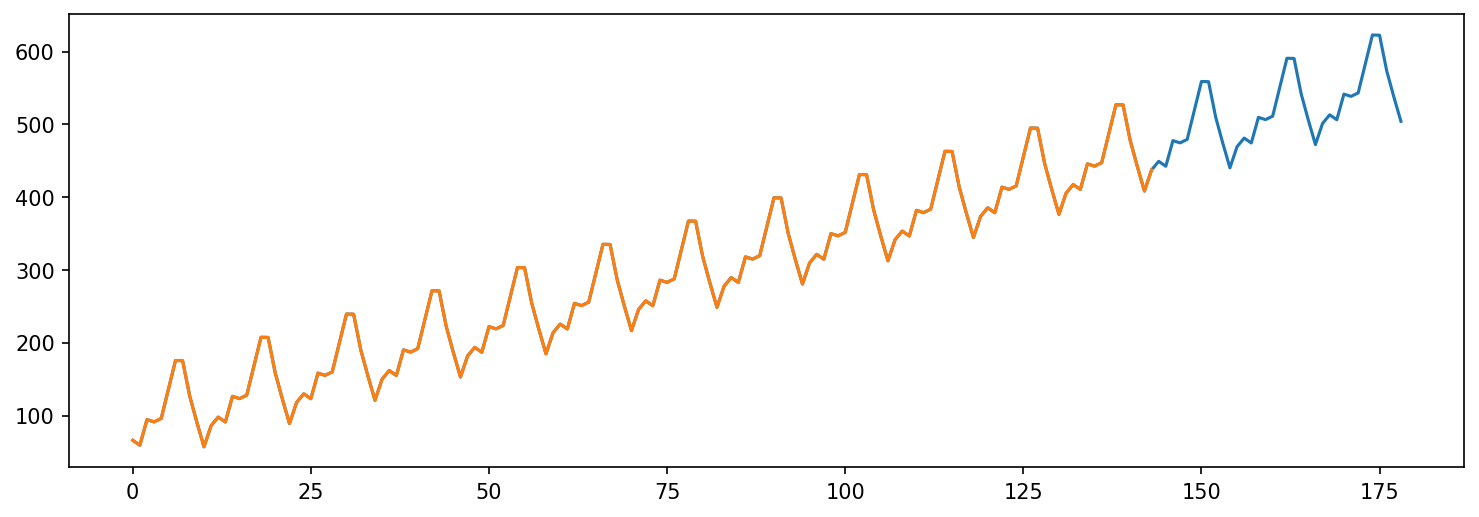

In [260]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(forecast_new)
plt.plot(forecast)
plt.show()

## Мультипликативнось 

In [287]:
def mse3 (passengers, x):
    passengers2 = passengers.drop('num_passengers', axis=1)
    f = np.dot(passengers2[['num','x0']], x[:2])
    s = np.dot(passengers2.drop(['num', 'x0'], axis=1), x[2:])
    forecast = s * f
    return ((passengers['num_passengers'] - forecast)**2).mean()

In [288]:
passengers

,num_passengers,x0,num,sin,cos,sin2,cos2,sin3,cos3,sin4,...,sin7,cos7,sin8,cos8,sin9,cos9,sin10,cos10,sin11,cos11
date,,,,,,,,,,,,,,,,,,,,,
1949-01-01,112,1,0,0.000000,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000,1.000000e+00
1949-02-01,118,1,1,0.500000,8.660254e-01,8.660254e-01,0.5,1.000000e+00,6.123234e-17,8.660254e-01,...,-0.500000,-8.660254e-01,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16,-8.660254e-01,0.5,-0.500000,8.660254e-01
1949-03-01,132,1,2,0.866025,5.000000e-01,8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,-8.660254e-01,...,0.866025,5.000000e-01,8.660254e-01,-0.5,3.673940e-16,-1.000000e+00,-8.660254e-01,-0.5,-0.866025,5.000000e-01
1949-04-01,129,1,3,1.000000,6.123234e-17,1.224647e-16,-1.0,-1.000000e+00,-1.836970e-16,-2.449294e-16,...,-1.000000,-4.286264e-16,-4.898587e-16,1.0,1.000000e+00,5.510911e-16,2.388680e-15,-1.0,-1.000000,-2.449913e-15
1949-05-01,121,1,4,0.866025,-5.000000e-01,-8.660254e-01,-0.5,-2.449294e-16,1.000000e+00,8.660254e-01,...,0.866025,-5.000000e-01,-8.660254e-01,-0.5,-7.347881e-16,1.000000e+00,8.660254e-01,-0.5,-0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,1,139,-0.500000,-8.660254e-01,8.660254e-01,0.5,-1.000000e+00,-1.028765e-14,8.660254e-01,...,0.500000,8.660254e-01,-8.660254e-01,-0.5,1.000000e+00,3.086296e-14,-8.660254e-01,0.5,0.500000,-8.660254e-01
1960-09-01,508,1,140,-0.866025,-5.000000e-01,8.660254e-01,-0.5,1.274375e-14,1.000000e+00,-8.660254e-01,...,-0.866025,-5.000000e-01,8.660254e-01,-0.5,9.809554e-15,1.000000e+00,-8.660254e-01,-0.5,0.866025,-5.000000e-01
1960-10-01,461,1,141,-1.000000,-1.175970e-14,2.351941e-14,-1.0,1.000000e+00,2.106826e-14,-4.703882e-14,...,1.000000,1.126366e-14,-9.407763e-14,1.0,-1.000000e+00,-6.320477e-14,3.233191e-14,-1.0,1.000000,1.151459e-13


In [289]:
res3 = minimize(lambda x: mse3(passengers, x), np.ones(len(passengers.columns)-1))
res3

      fun: 90517.11309450591
 hess_inv: array([[ 3.20345234e-06, -1.41624106e-05, -3.64998588e-05,
         9.20079434e-05,  3.36014078e-05,  7.47734742e-06,
        -7.53557446e-06, -9.22709052e-06, -2.87815326e-05,
         4.35486342e-07,  4.22502765e-05,  6.08163294e-05,
         0.00000000e+00, -1.06557547e-05,  4.58350617e-05,
        -8.69770577e-05, -4.83773201e-05,  4.35486342e-07,
         3.75545375e-06, -9.22709052e-06,  3.81914874e-05,
         7.47734742e-06, -4.42530129e-05, -7.95740784e-05],
       [-1.41624106e-05,  3.46459001e-04,  9.03431977e-04,
         2.92358257e-04, -4.44248904e-04, -1.99611484e-04,
         1.98147709e-04, -2.78868741e-05,  5.62087414e-04,
         1.03970716e-05, -5.39445835e-04, -5.02781015e-04,
         0.00000000e+00, -1.42756291e-05, -1.00931758e-03,
         6.45836723e-04,  4.57282991e-04,  1.03970716e-05,
         6.46990710e-05, -2.78868741e-05, -5.42303571e-04,
        -1.99611484e-04,  8.00093648e-04, -2.11035886e-04],
       [-3.649

In [283]:
res3.x[:2]

array([-0.63441913, 14.75003179])

In [295]:
x= [-0.13200955,  2.85810167,  2.32575473,  3.4618589 ,  0.87895566,
       -0.82874748,  1.94942174,  0.65301201,  1.57688302,  0.1060792 ,
        1.49240434,  0.2259106 ,  1.        ,  0.46549259,  0.57309121,
        0.22523034,  0.47054894,  0.1060792 ,  0.05510801,  0.65301201,
        1.15830664, -0.82874748, -0.28770439,  3.46281832]

In [296]:
    passengers2 = passengers.drop('num_passengers', axis=1)
    f = np.dot(passengers2[['num','x0']], x[:2])
    s = np.dot(passengers2.drop(['num', 'x0'], axis=1), x[2:])
    forecast = s * f

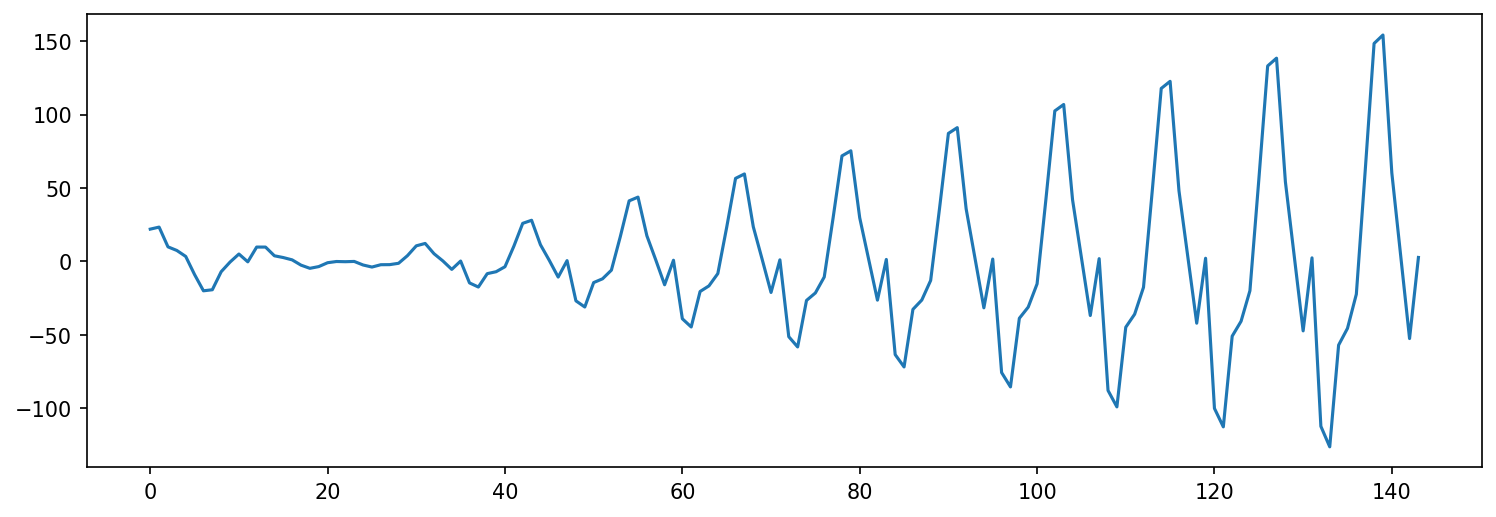

In [297]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(forecast)
plt.show()

ПРОГНОЗ 

In [298]:
new_1 = pd.date_range(start = '1949-01-01 00:00:00', end = '1963-12-01 00:00:00', freq = 'M')
passengers_1 = pd.read_csv('C:/Users/mag/passengers.csv', index_col=0, parse_dates=True)

In [299]:
f_1 = passengers.reindex(new)

In [301]:
f_1['x0'] = 1
f_1['num'] = range(0, len(f_1))


In [302]:
for n in range(1,12):
    f_1[f'sin{n}'] = np.sin((n*2*np.pi*(f_1['num']))/12)
    f_1[f'cos{n}'] = np.cos((n*2*np.pi*(f_1['num']))/12)

In [303]:
f_1

,num_passengers,x0,num,sin,cos,sin2,cos2,sin3,cos3,sin4,...,sin8,cos8,sin9,cos9,sin10,cos10,sin11,cos11,sin1,cos1
1949-01-31,NaN,1,0,NaN,NaN,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
1949-02-28,NaN,1,1,NaN,NaN,8.660254e-01,0.5,1.000000e+00,6.123234e-17,8.660254e-01,...,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16,-8.660254e-01,0.5,-5.000000e-01,8.660254e-01,5.000000e-01,8.660254e-01
1949-03-31,NaN,1,2,NaN,NaN,8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,-8.660254e-01,...,8.660254e-01,-0.5,3.673940e-16,-1.000000e+00,-8.660254e-01,-0.5,-8.660254e-01,5.000000e-01,8.660254e-01,5.000000e-01
1949-04-30,NaN,1,3,NaN,NaN,1.224647e-16,-1.0,-1.000000e+00,-1.836970e-16,-2.449294e-16,...,-4.898587e-16,1.0,1.000000e+00,5.510911e-16,2.388680e-15,-1.0,-1.000000e+00,-2.449913e-15,1.000000e+00,6.123234e-17
1949-05-31,NaN,1,4,NaN,NaN,-8.660254e-01,-0.5,-2.449294e-16,1.000000e+00,8.660254e-01,...,-8.660254e-01,-0.5,-7.347881e-16,1.000000e+00,8.660254e-01,-0.5,-8.660254e-01,-5.000000e-01,8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963-07-31,NaN,1,174,NaN,NaN,-2.841923e-14,1.0,2.841800e-14,-1.000000e+00,-5.683847e-14,...,-1.136769e-13,1.0,8.525399e-14,-1.000000e+00,-5.683104e-14,1.0,1.420949e-13,-1.000000e+00,1.420962e-14,-1.000000e+00
1963-08-31,NaN,1,175,NaN,NaN,8.660254e-01,0.5,-1.000000e+00,-3.380830e-14,8.660254e-01,...,-8.660254e-01,-0.5,1.000000e+00,4.458148e-14,-8.660254e-01,0.5,5.000000e-01,-8.660254e-01,-5.000000e-01,-8.660254e-01
1963-09-30,NaN,1,176,NaN,NaN,8.660254e-01,-0.5,1.764482e-14,1.000000e+00,-8.660254e-01,...,8.660254e-01,-0.5,-3.908966e-15,1.000000e+00,-8.660254e-01,-0.5,8.660254e-01,-5.000000e-01,-8.660254e-01,-5.000000e-01
1963-10-31,NaN,1,177,NaN,NaN,-1.764358e-14,-1.0,1.000000e+00,4.458890e-14,3.528716e-14,...,7.057432e-14,1.0,-1.000000e+00,-7.692329e-14,-2.952770e-15,-1.0,1.000000e+00,1.445448e-13,-1.000000e+00,8.821790e-15


In [305]:
del f_1 ['sin1']

In [306]:
del f_1 ['cos1']

In [307]:
f_1

,num_passengers,x0,num,sin,cos,sin2,cos2,sin3,cos3,sin4,...,sin7,cos7,sin8,cos8,sin9,cos9,sin10,cos10,sin11,cos11
1949-01-31,NaN,1,0,NaN,NaN,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,1.000000e+00
1949-02-28,NaN,1,1,NaN,NaN,8.660254e-01,0.5,1.000000e+00,6.123234e-17,8.660254e-01,...,-5.000000e-01,-8.660254e-01,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16,-8.660254e-01,0.5,-5.000000e-01,8.660254e-01
1949-03-31,NaN,1,2,NaN,NaN,8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,-8.660254e-01,...,8.660254e-01,5.000000e-01,8.660254e-01,-0.5,3.673940e-16,-1.000000e+00,-8.660254e-01,-0.5,-8.660254e-01,5.000000e-01
1949-04-30,NaN,1,3,NaN,NaN,1.224647e-16,-1.0,-1.000000e+00,-1.836970e-16,-2.449294e-16,...,-1.000000e+00,-4.286264e-16,-4.898587e-16,1.0,1.000000e+00,5.510911e-16,2.388680e-15,-1.0,-1.000000e+00,-2.449913e-15
1949-05-31,NaN,1,4,NaN,NaN,-8.660254e-01,-0.5,-2.449294e-16,1.000000e+00,8.660254e-01,...,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5,-7.347881e-16,1.000000e+00,8.660254e-01,-0.5,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963-07-31,NaN,1,174,NaN,NaN,-2.841923e-14,1.0,2.841800e-14,-1.000000e+00,-5.683847e-14,...,2.841304e-14,-1.000000e+00,-1.136769e-13,1.0,8.525399e-14,-1.000000e+00,-5.683104e-14,1.0,1.420949e-13,-1.000000e+00
1963-08-31,NaN,1,175,NaN,NaN,8.660254e-01,0.5,-1.000000e+00,-3.380830e-14,8.660254e-01,...,5.000000e-01,8.660254e-01,-8.660254e-01,-0.5,1.000000e+00,4.458148e-14,-8.660254e-01,0.5,5.000000e-01,-8.660254e-01
1963-09-30,NaN,1,176,NaN,NaN,8.660254e-01,-0.5,1.764482e-14,1.000000e+00,-8.660254e-01,...,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5,-3.908966e-15,1.000000e+00,-8.660254e-01,-0.5,8.660254e-01,-5.000000e-01
1963-10-31,NaN,1,177,NaN,NaN,-1.764358e-14,-1.0,1.000000e+00,4.458890e-14,3.528716e-14,...,1.000000e+00,9.301745e-15,7.057432e-14,1.0,-1.000000e+00,-7.692329e-14,-2.952770e-15,-1.0,1.000000e+00,1.445448e-13


In [328]:
passengers_2 = f_1.drop('num_passengers', axis=1)
f = np.dot(passengers_2[['num','x0']], x[:2])
d = np.dot(passengers_2.drop(['num', 'x0'], axis=1), x[2:])
forecast2 = f * d

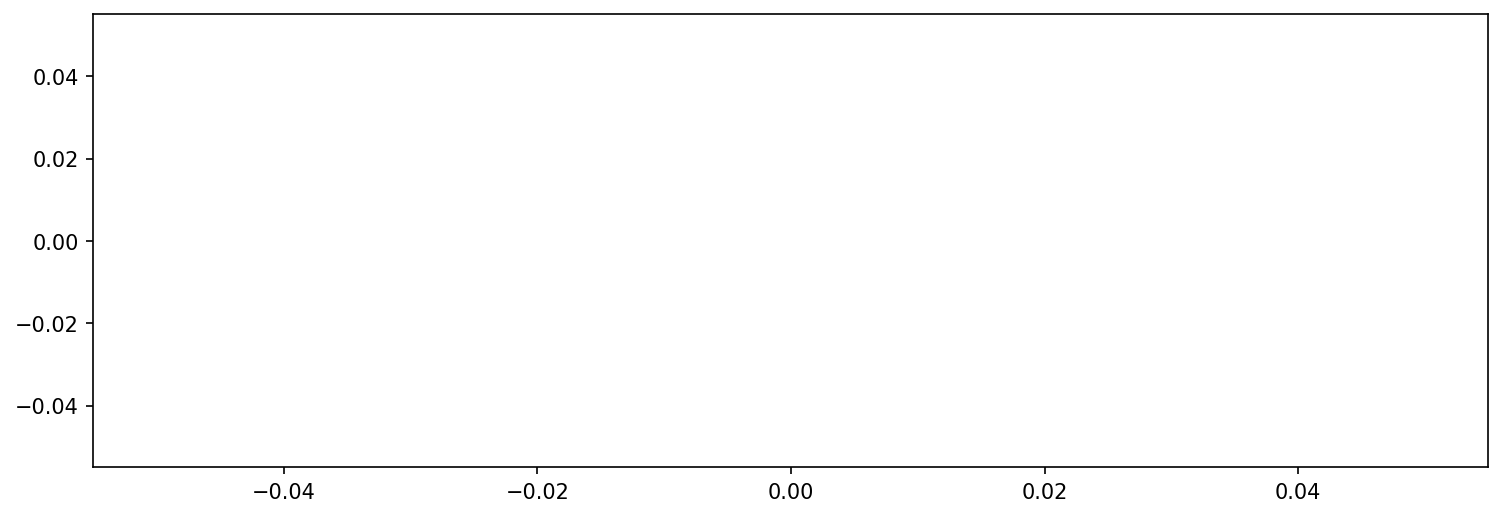

In [329]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(forecast)
plt.show()

In [330]:
f

array([  2.85810167,   2.72609212,   2.59408257,   2.46207302,
         2.33006347,   2.19805392,   2.06604437,   1.93403482,
         1.80202527,   1.67001572,   1.53800617,   1.40599662,
         1.27398707,   1.14197752,   1.00996797,   0.87795842,
         0.74594887,   0.61393932,   0.48192977,   0.34992022,
         0.21791067,   0.08590112,  -0.04610843,  -0.17811798,
        -0.31012753,  -0.44213708,  -0.57414663,  -0.70615618,
        -0.83816573,  -0.97017528,  -1.10218483,  -1.23419438,
        -1.36620393,  -1.49821348,  -1.63022303,  -1.76223258,
        -1.89424213,  -2.02625168,  -2.15826123,  -2.29027078,
        -2.42228033,  -2.55428988,  -2.68629943,  -2.81830898,
        -2.95031853,  -3.08232808,  -3.21433763,  -3.34634718,
        -3.47835673,  -3.61036628,  -3.74237583,  -3.87438538,
        -4.00639493,  -4.13840448,  -4.27041403,  -4.40242358,
        -4.53443313,  -4.66644268,  -4.79845223,  -4.93046178,
        -5.06247133,  -5.19448088,  -5.32649043,  -5.45

In [327]:
len(x)

24